In [1]:
from qiskit import QuantumCircuit, assemble, Aer, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram, plot_bloch_vector
import numpy as np
from math import sqrt, pi

In [2]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from circuit for simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result

In [3]:
# Print out the output statevector and draw the circuit
out_state = result.get_statevector()
print(out_state) # Display the output state vector
qc.measure_all()
qc.draw()

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


┌─────────────────┐ ░  ░ ┌─┐
     q: ┤ Initialize(0,1) ├─░──░─┤M├
        └─────────────────┘ ░  ░ └╥┘
meas: 1/══════════════════════════╩═
                                  0

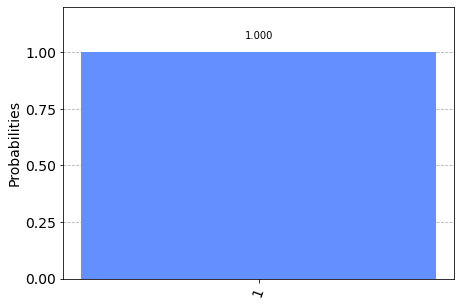

In [4]:
# Histogram of counts
counts = result.get_counts()
plot_histogram(counts) 
# We can see that we (unsurprisingly) have a 100% chance of measuring |1⟩

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


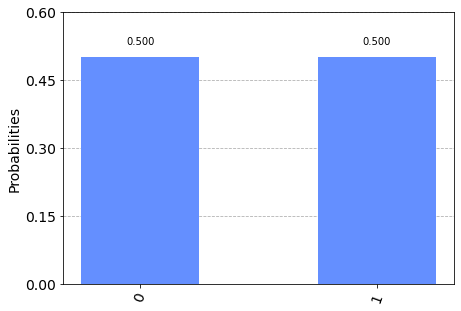

In [5]:
# Try again with initial state that's a superposition
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)           # Print the result
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

In [6]:
# You must normalize input state vector amplitudes or else Qiskit error
# vector = [1,1]
# qc.initialize(vector, 0)

In [7]:
# Quick Exercise
# 1. Create a state vector that will give a 1/3 probability of measuring |0>
# 2. Create a different state vector that will give the same measurement probailities
# 3. Verify that the probability of measuring |1> for these two states is 2/3
initial_state = [1/sqrt(2), 1j/sqrt(2)]
 

In [8]:
# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2) 

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'00': 503, '11': 497}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

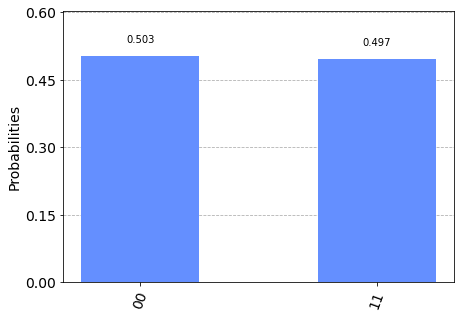

In [9]:
# Plot a histogram
plot_histogram(counts)

In [10]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     ├───┤ ░   │        ░       
q_1: ┤ X ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1